<a href="https://colab.research.google.com/github/achyutjagini/IOT-project-weather-data-GUI/blob/main/model_create.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import time
import os
import datetime
import IPython
import IPython.display
import matplotlib as mpl
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input
from sklearn.metrics import confusion_matrix
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df_weather = pd.read_csv('gdrive/MyDrive/model/weatherHistory.csv')

In [5]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [6]:
df_weather[20: 400:24]

Formatted Date        Summary Precip Type  \
20   2006-04-01 20:00:00.000 +0200  Mostly Cloudy        rain   
44   2006-04-10 20:00:00.000 +0200  Mostly Cloudy        rain   
68   2006-04-11 20:00:00.000 +0200       Overcast        rain   
92   2006-04-12 20:00:00.000 +0200  Mostly Cloudy        rain   
116  2006-04-13 20:00:00.000 +0200       Overcast        rain   
140  2006-04-14 20:00:00.000 +0200  Mostly Cloudy        rain   
164  2006-04-15 20:00:00.000 +0200  Mostly Cloudy        rain   
188  2006-04-16 20:00:00.000 +0200  Mostly Cloudy        rain   
212  2006-04-17 20:00:00.000 +0200  Mostly Cloudy        rain   
236  2006-04-18 20:00:00.000 +0200  Mostly Cloudy        rain   
260  2006-04-19 20:00:00.000 +0200       Overcast        rain   
284  2006-04-02 20:00:00.000 +0200  Partly Cloudy        rain   
308  2006-04-20 20:00:00.000 +0200       Overcast        rain   
332  2006-04-21 20:00:00.000 +0200  Partly Cloudy        rain   
356  2006-04-22 20:00:00.000 +0200  Partly Cloudy        rain   
380  2006-04-23 20:00:00.000 +0200  Partly Cloudy        rain   

     Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
20         11.550000                 11.550000      0.77             7.3899   
44         16.061111                 16.061111      0.53            21.3969   
68          8.961111                  5.777778      0.93            23.2162   
92          9.900000                  7.716667      0.66            15.7297   
116         8.072222                  6.433333      0.75             9.5151   
140        13.850000                 13.850000      0.64            11.5598   
164        13.088889                 13.088889      0.67             9.2736   
188        13.922222                 13.922222      0.78            11.7691   
212        13.250000                 13.250000      0.69             4.7173   
236        16.188889                 16.188889      0.61             5.0876   
260        13.255556                 13.255556      0.93             3.1395   
284        12.288889                 12.288889      0.80             3.5420   
308        12.400000                 12.400000      0.98             2.3506   
332        13.994444                 13.994444      0.88             1.1431   
356        15.566667                 15.566667      0.74             0.5152   
380        17.422222                 17.422222      0.65             0.5313   

     Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
20                    147.0          11.0285         0.0   
44                    149.0           9.9820         0.0   
68                    340.0           3.8157         0.0   
92                    348.0          11.0285         0.0   
116                   150.0           9.9820         0.0   
140                   231.0          11.4471         0.0   
164                   138.0           9.9820         0.0   
188                   279.0          11.2861         0.0   
212                   325.0           9.9820         0.0   
236                    25.0          10.3523         0.0   
260                   228.0           8.0500         0.0   
284                   161.0          11.0285         0.0   
308                    72.0           5.8282         0.0   
332                    35.0           9.6278         0.0   
356                   116.0           9.9820         0.0   
380                   139.0           9.9820         0.0   

     Pressure (millibars)                                      Daily Summary  
20                1015.85                  Partly cloudy throughout the day.  
44                1008.11                  Mostly cloudy throughout the day.  
68                1004.85                              Foggy in the evening.  
92                1005.48         Foggy overnight and breezy in the morning.  
116               1010.91                       Overcast throughout the day.  
140               1013.42                  Mostly cloudy throughout the day

In [7]:
print ("Unique values are:\n",df_weather.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [8]:
df_weather = df_weather.sort_values(by='Formatted Date')

In [9]:
df_weather[20: 400:24]

Formatted Date        Summary Precip Type  \
2900  2006-01-01 20:00:00.000 +0100       Overcast        rain   
3164  2006-01-02 20:00:00.000 +0100       Overcast        rain   
3428  2006-01-03 20:00:00.000 +0100       Overcast        rain   
3500  2006-01-04 20:00:00.000 +0100       Overcast        rain   
3524  2006-01-05 20:00:00.000 +0100       Overcast        rain   
3548  2006-01-06 20:00:00.000 +0100       Overcast        rain   
3572  2006-01-07 20:00:00.000 +0100  Mostly Cloudy        snow   
3596  2006-01-08 20:00:00.000 +0100          Clear        snow   
3620  2006-01-09 20:00:00.000 +0100  Mostly Cloudy        snow   
2924  2006-01-10 20:00:00.000 +0100          Clear        snow   
2948  2006-01-11 20:00:00.000 +0100          Clear        snow   
2972  2006-01-12 20:00:00.000 +0100          Clear        snow   
2996  2006-01-13 20:00:00.000 +0100          Foggy        snow   
3020  2006-01-14 20:00:00.000 +0100          Clear        snow   
3044  2006-01-15 20:00:00.000 +0100       Overcast        snow   
3068  2006-01-16 20:00:00.000 +0100       Overcast        snow   

      Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2900         5.972222                  1.861111      0.80            24.2305   
3164         2.855556                 -1.644444      0.96            20.1733   
3428         2.244444                  2.244444      0.92             2.6887   
3500         2.733333                 -1.405556      0.89            17.3719   
3524         2.827778                  0.566667      1.00             8.1305   
3548         2.222222                 -0.144444      1.00             8.1305   
3572        -1.016667                 -2.783333      0.99             5.1198   
3596        -2.222222                 -5.250000      0.88             7.7602   
3620        -1.222222                 -1.222222      0.88             0.1288   
2924        -1.500000                 -1.500000      0.85             3.3166   
2948        -1.038889                 -4.366667      0.92             9.3863   
2972        -0.094444                 -0.094444      0.92             1.1270   
2996        -0.022222                 -3.183333      0.92             9.4829   
3020        -2.155556                 -5.238889      0.89             7.9695   
3044        -2.755556                 -2.755556      0.78             1.8515   
3068        -3.794444                 -3.794444      0.84             4.3792   

      Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
2900                   140.0          11.2700         0.0   
3164                   209.0           4.0250         0.0   
3428                   166.0          10.7709         0.0   
3500                    20.0          11.1251         0.0   
3524                   344.0           4.2021         0.0   
3548                   338.0           5.8604         0.0   
3572                    53.0           6.0697         0.0   
3596                    30.0           9.8049         0.0   
3620                   225.0           9.9820         0.0   
2924                   283.0           7.2128         0.0   
2948                   160.0           3.9606         0.0   
2972                   270.0           3.9284         0.0   
2996                   327.0           2.9785         0.0   
3020                    59.0           6.9069         0.0   
3044                    75.0          11.1251         0.0   
3068                    75.0           7.9695         0.0   

      Pressure (millibars)                                      Daily Summary  
2900               1009.39                  Mostly cloudy throughout the day.  
3164               1012.58                       Overcast throughout the day.  
3428               1023.73                  Mostly cloudy throughout the day.  
3500               1024.21                       Overcast throughout the day.  
3524                  0.00                              Foggy in the morning.  
3548               

## Missing value

In [10]:
wt_missing = df_weather.isna().sum()
wt_missing

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [11]:
missing_value_count = (df_weather.isnull().sum())
print(missing_value_count[missing_value_count > 0])
total_cells = np.product(df_weather.shape)
total_missing_value = missing_value_count.sum()
print("Total percentage of our missing value is:",round((total_missing_value / total_cells * 100),4))
print('Total number of our cells is :',total_cells)
print('Total number of our missing value is :',total_missing_value)

Precip Type    517
dtype: int64
Total percentage of our missing value is: 0.0447
Total number of our cells is : 1157436
Total number of our missing value is : 517


In [12]:
df_weather['Precip Type'].fillna(df_weather['Precip Type'].value_counts().index[0],inplace=True)
df_weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

## Remove unimportant features

In [13]:
df_weather.drop(["Daily Summary"], axis=1, inplace=True)

In [14]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)'],
      dtype='object')

In [15]:
df_weather['Loud Cover'].value_counts()

0.0    96453
Name: Loud Cover, dtype: int64

In [16]:
df_weather.drop(['Loud Cover'],axis=1,inplace=True)

In [17]:
df_weather.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)'],
      dtype='object')

## Convert categorical data

In [18]:
Summary_Weather=df_weather["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

Weather Type  Count
0                         Partly Cloudy  31733
1                         Mostly Cloudy  28094
2                              Overcast  16597
3                                 Clear  10890
4                                 Foggy   7148
5                   Breezy and Overcast    528
6              Breezy and Mostly Cloudy    516
7              Breezy and Partly Cloudy    386
8                 Dry and Partly Cloudy     86
9               Windy and Partly Cloudy     67
10                           Light Rain     63
11                               Breezy     54
12                   Windy and Overcast     45
13              Humid and Mostly Cloudy     40
14                              Drizzle     39
15              Windy and Mostly Cloudy     35
16                     Breezy and Foggy     35
17                                  Dry     34
18              Humid and Partly Cloudy     17
19                Dry and Mostly Cloudy     14
20                                 Rain     10
21                                Windy      8
22                   Humid and Overcast      7
23                      Windy and Foggy      4
24                       Breezy and Dry      1
25  Dangerously Windy and Partly Cloudy      1
26                        Windy and Dry      1

In [19]:
print(df_weather['Summary'].unique())

['Partly Cloudy' 'Mostly Cloudy' 'Overcast' 'Foggy' 'Clear'
 'Breezy and Overcast' 'Breezy and Mostly Cloudy' 'Windy and Overcast'
 'Windy and Foggy' 'Breezy and Foggy' 'Breezy and Partly Cloudy'
 'Windy and Partly Cloudy' 'Humid and Mostly Cloudy'
 'Humid and Partly Cloudy' 'Breezy' 'Windy and Mostly Cloudy'
 'Dangerously Windy and Partly Cloudy' 'Dry and Partly Cloudy' 'Dry'
 'Windy' 'Humid and Overcast' 'Breezy and Dry' 'Dry and Mostly Cloudy'
 'Light Rain' 'Drizzle' 'Windy and Dry' 'Rain']


In [20]:
df_weather = pd.get_dummies(df_weather, columns = ['Summary'])
print(df_weather)

                      Formatted Date Precip Type  Temperature (C)  \
2880   2006-01-01 00:00:00.000 +0100        rain         0.577778   
2881   2006-01-01 01:00:00.000 +0100        rain         1.161111   
2882   2006-01-01 02:00:00.000 +0100        rain         1.666667   
2883   2006-01-01 03:00:00.000 +0100        rain         1.711111   
2884   2006-01-01 04:00:00.000 +0100        rain         1.183333   
...                              ...         ...              ...   
89728  2016-12-31 19:00:00.000 +0100        rain         0.488889   
89729  2016-12-31 20:00:00.000 +0100        rain         0.072222   
89730  2016-12-31 21:00:00.000 +0100        snow        -0.233333   
89731  2016-12-31 22:00:00.000 +0100        snow        -0.472222   
89732  2016-12-31 23:00:00.000 +0100        snow        -0.677778   

       Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2880                  -4.050000      0.89            17.1143   
2881                  -3.238889      0.85  

In [21]:
precip_Label= df_weather["Precip Type"].value_counts().reset_index()
precip_Label.columns=["Precip Type","Count"]
precip_Label

Precip Type  Count
0        rain  85741
1        snow  10712

In [22]:
le = LabelEncoder()
df_weather['Precip Type']=le.fit_transform(df_weather['Precip Type'])
df_weather.head(10)

Formatted Date  Precip Type  Temperature (C)  \
2880  2006-01-01 00:00:00.000 +0100            0         0.577778   
2881  2006-01-01 01:00:00.000 +0100            0         1.161111   
2882  2006-01-01 02:00:00.000 +0100            0         1.666667   
2883  2006-01-01 03:00:00.000 +0100            0         1.711111   
2884  2006-01-01 04:00:00.000 +0100            0         1.183333   
2885  2006-01-01 05:00:00.000 +0100            0         1.205556   
2886  2006-01-01 06:00:00.000 +0100            0         2.222222   
2887  2006-01-01 07:00:00.000 +0100            0         2.072222   
2888  2006-01-01 08:00:00.000 +0100            0         2.200000   
2889  2006-01-01 09:00:00.000 +0100            0         2.733333   

      Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2880                 -4.050000      0.89            17.1143   
2881                 -3.238889      0.85            16.6152   
2882                 -3.155556      0.82            20.2538   
2883                 -2.194444      0.82            14.4900   
2884                 -2.744444      0.86            13.9426   
2885                 -3.072222      0.85            15.9068   
2886                 -2.494444      0.79            20.5597   
2887                 -3.272222      0.81            25.4219   
2888                 -2.850000      0.80            23.1679   
2889                 -2.133333      0.82            22.8781   

      Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
2880                   140.0           9.9820               1016.66   
2881                   139.0           9.9015               1016.15   
2882                   140.0           9.9015               1015.87   
2883                   140.0           9.9015               1015.56   
2884                   134.0           9.9015               1014.98   
2885                   149.0           9.9820               1014.08   
2886                   140.0          10.0464               1013.93   
2887                   136.0          10.0303               1013.24   
2888                   140.0          11.2056               1013.19   
2889                   140.0           9.9820               1013.29   

      Summary_Breezy  ...  Summary_Mostly Cloudy  Summary_Overcast  \
2880               0  ...                      0                 0   
2881               0  ...                      1                 0   
2882               0  ...                      1                 0   
2883               0  ...                      0                 1   
2884               0  ...                      1                 0   
2885               0  ...                      1                 0   
2886               0  ...                      1                 0   
2887               0  ...                      1                 0   
2888               0  ...                      1                 0   
2889               0  ...                      1                 0   

      Summary_Partly Cloudy  Summary_Rain  Summary_Windy  \
2880                      1             0              0   
2881                      0             0              0   
2882                      0             0              0   
2883                      0             0              0   
2884                      0             0              0   
2885                      0             0              0   
2886                      0             0              0   
2887                      0             0              0   
2888                      0             0              0   
2889                      0             0              0   

      Summary_Windy and Dry  Summary_Windy and Foggy  \
2880                      0                        0   
2881                      0                        0   
2882                      0                        0   
2883                      0                        0   
2884                      0                        0   
2885             

In [23]:
df_weather.head(20)

Formatted Date  Precip Type  Temperature (C)  \
2880  2006-01-01 00:00:00.000 +0100            0         0.577778   
2881  2006-01-01 01:00:00.000 +0100            0         1.161111   
2882  2006-01-01 02:00:00.000 +0100            0         1.666667   
2883  2006-01-01 03:00:00.000 +0100            0         1.711111   
2884  2006-01-01 04:00:00.000 +0100            0         1.183333   
2885  2006-01-01 05:00:00.000 +0100            0         1.205556   
2886  2006-01-01 06:00:00.000 +0100            0         2.222222   
2887  2006-01-01 07:00:00.000 +0100            0         2.072222   
2888  2006-01-01 08:00:00.000 +0100            0         2.200000   
2889  2006-01-01 09:00:00.000 +0100            0         2.733333   
2890  2006-01-01 10:00:00.000 +0100            0         2.788889   
2891  2006-01-01 11:00:00.000 +0100            0         3.822222   
2892  2006-01-01 12:00:00.000 +0100            0         4.911111   
2893  2006-01-01 13:00:00.000 +0100            0         6.205556   
2894  2006-01-01 14:00:00.000 +0100            0         7.438889   
2895  2006-01-01 15:00:00.000 +0100            0         6.950000   
2896  2006-01-01 16:00:00.000 +0100            0         5.972222   
2897  2006-01-01 17:00:00.000 +0100            0         5.905556   
2898  2006-01-01 18:00:00.000 +0100            0         4.955556   
2899  2006-01-01 19:00:00.000 +0100            0         5.472222   

      Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
2880                 -4.050000      0.89            17.1143   
2881                 -3.238889      0.85            16.6152   
2882                 -3.155556      0.82            20.2538   
2883                 -2.194444      0.82            14.4900   
2884                 -2.744444      0.86            13.9426   
2885                 -3.072222      0.85            15.9068   
2886                 -2.494444      0.79            20.5597   
2887                 -3.272222      0.81            25.4219   
2888                 -2.850000      0.80            23.1679   
2889                 -2.133333      0.82            22.8781   
2890                 -1.905556      0.83            21.6062   
2891                 -0.738889      0.82            22.7976   
2892                  0.805556      0.77            21.4452   
2893                  2.238889      0.76            23.4094   
2894                  3.677778      0.72            24.8423   
2895                  2.811111      0.74            27.5954   
2896                  2.388889      0.81            19.3200   
2897                  2.250000      0.80            19.7869   
2898                  0.383333      0.86            25.9371   
2899                  1.100000      0.83            25.4058   

      Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  \
2880                   140.0           9.9820               1016.66   
2881                   139.0           9.9015               1016.15   
2882                   140.0           9.9015               1015.87   
2883                   140.0           9.9015               1015.56   
2884                   134.0           9.9015               1014.98   
2885                   149.0           9.9820               1014.08   
2886                   140.0          10.0464               1013.93   
2887                   136.0          10.0303               1013.24   
2888                   140.0          11.2056               1013.19   
2889                   140.0           9.9820               1013.29   
2890                   138.0           9.9820               1013.42   
2891                   139.0           9.9820               1012.72   
2892                   149.0          11.2056               1012.00   
2893                   141.0          10.3523               1011.18   
2894                   139.0          11.2056               1010.49   
2895                   139.0          11.2056               1010.29   
2896                   148.0          11

## Data visualization

array([<Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlabel='Formatted Date'>,
       <Axes: xlabel='Formatted Date'>, <Axes: xlab

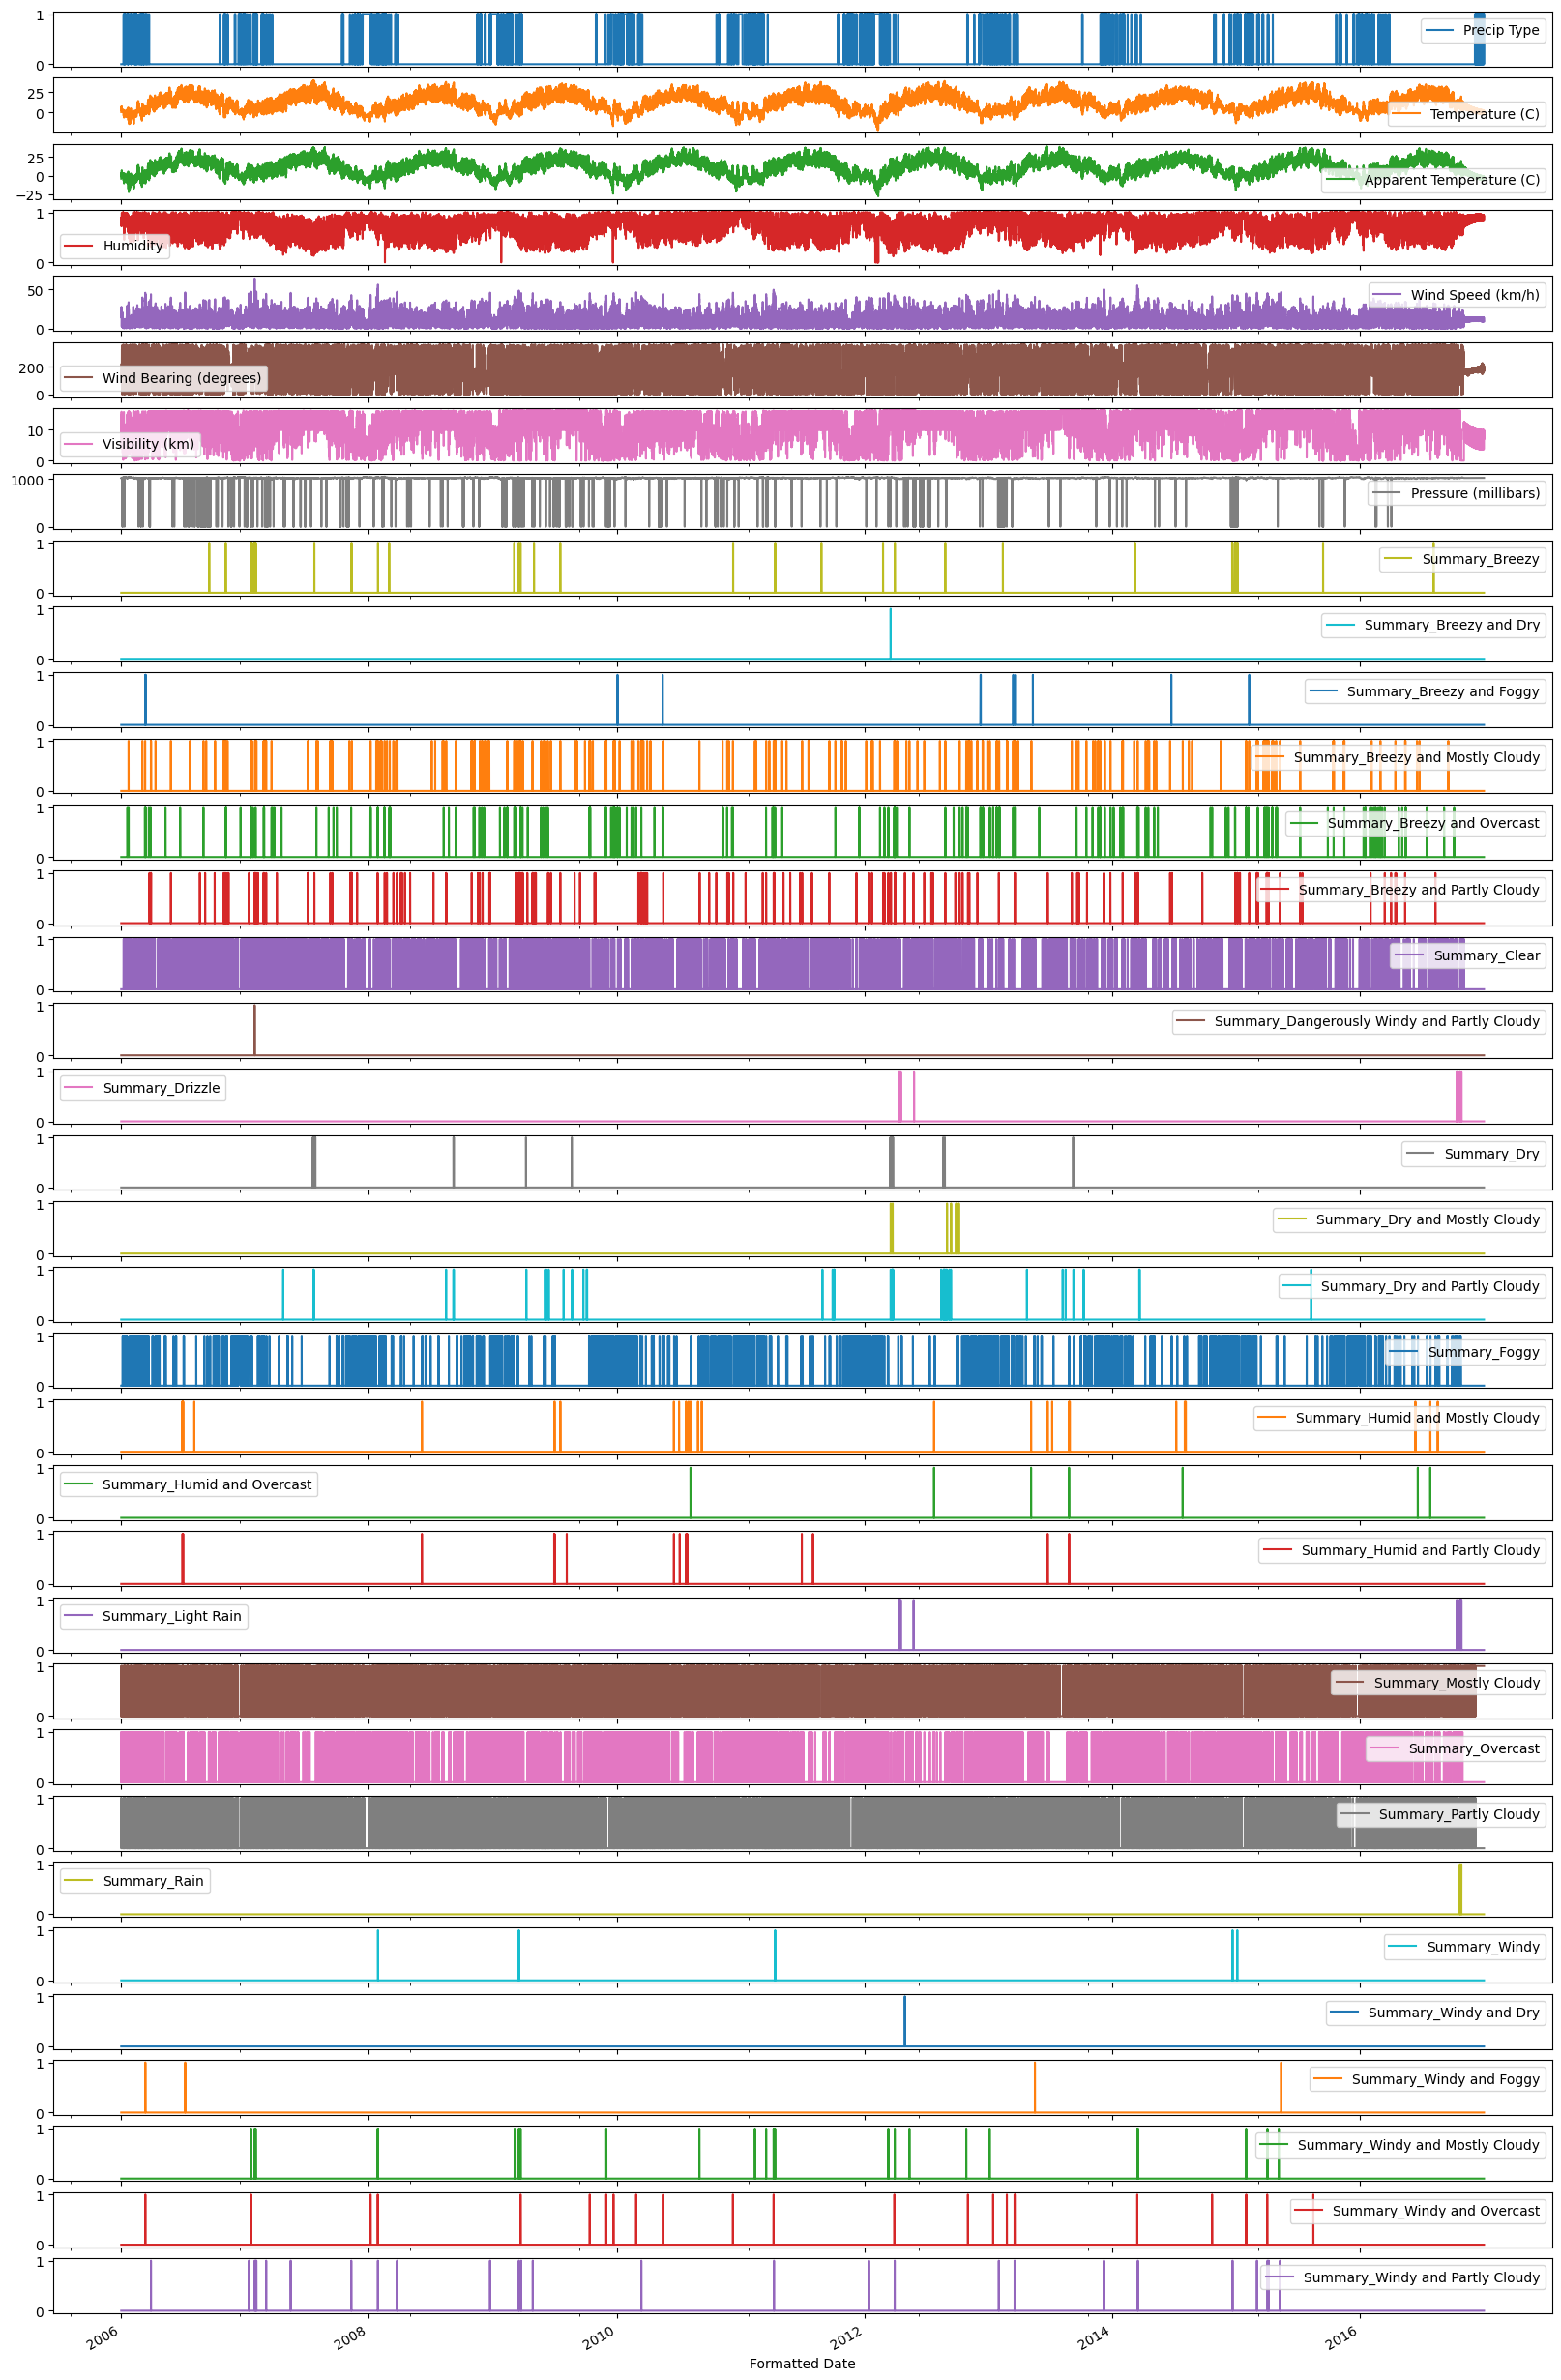

In [24]:
date_time = pd.to_datetime(df_weather.pop('Formatted Date'), format='%Y-%m-%d %H:%M:%S.%f %z')
plot_cols = df_weather.columns
plot_features = df_weather[plot_cols]
plot_features.index = date_time
plot_features.plot( figsize=(20,35), subplots=True)

In [25]:
df_weather.describe().transpose()

count         mean         std  \
Precip Type                                  96453.0     0.111059    0.314207   
Temperature (C)                              96453.0    11.932678    9.551546   
Apparent Temperature (C)                     96453.0    10.855029   10.696847   
Humidity                                     96453.0     0.734899    0.195473   
Wind Speed (km/h)                            96453.0    10.810640    6.913571   
Wind Bearing (degrees)                       96453.0   187.509232  107.383428   
Visibility (km)                              96453.0    10.347325    4.192123   
Pressure (millibars)                         96453.0  1003.235956  116.969906   
Summary_Breezy                               96453.0     0.000560    0.023655   
Summary_Breezy and Dry                       96453.0     0.000010    0.003220   
Summary_Breezy and Foggy                     96453.0     0.000363    0.019046   
Summary_Breezy and Mostly Cloudy             96453.0     0.005350    0.072946   
Summary_Breezy and Overcast                  96453.0     0.005474    0.073785   
Summary_Breezy and Partly Cloudy             96453.0     0.004002    0.063135   
Summary_Clear                                96453.0     0.112905    0.316478   
Summary_Dangerously Windy and Partly Cloudy  96453.0     0.000010    0.003220   
Summary_Drizzle                              96453.0     0.000404    0.020104   
Summary_Dry                                  96453.0     0.000353    0.018772   
Summary_Dry and Mostly Cloudy                96453.0     0.000145    0.012047   
Summary_Dry and Partly Cloudy                96453.0     0.000892    0.029847   
Summary_Foggy                                96453.0     0.074109    0.261949   
Summary_Humid and Mostly Cloudy              96453.0     0.000415    0.020360   
Summary_Humid and Overcast                   96453.0     0.000073    0.008519   
Summary_Humid and Partly Cloudy              96453.0     0.000176    0.013275   
Summary_Light Rain                           96453.0     0.000653    0.025549   
Summary_Mostly Cloudy                        96453.0     0.291271    0.454351   
Summary_Overcast                             96453.0     0.172073    0.377446   
Summary_Partly Cloudy                        96453.0     0.329000    0.469852   
Summary_Rain                                 96453.0     0.000104    0.010182   
Summary_Windy                                96453.0     0.000083    0.009107   
Summary_Windy and Dry                        96453.0     0.000010    0.003220   
Summary_Windy and Foggy                      96453.0     0.000041    0.006440   
Summary_Windy and Mostly Cloudy              96453.0     0.000363    0.019046   
Summary_Windy and Overcast                   96453.0     0.000467    0.021595   
Summary_Windy and Partly Cloudy              96453.0     0.000695    0.026347   

                                                   min          25%  \
Precip Type                                   0.000000     0.000000   
Temperature (C)                             -21.822222     4.688889   
Apparent Temperature (C)                    -27.716667     2.311111   
Humidity                                      0.000000     0.600000   
Wind Speed (km/h)                             0.000000     5.828200   
Wind Bearing (degrees)                        0.000000   116.000000   
Visibility (km)                               0.000000     8.339800   
Pressure (millibars)                          0.000000  1011.900000   
Summary_Breezy                                0.000000     0.000000   
Summary_Breezy and Dry                        0.000000     0.000000   
Summary_Breezy and Foggy                      0.000000     0.000000   
Summary_Breezy and Mostly Cloudy              0.000000     0.000000   
Summary_Breezy and Overcast                   0.000000     0.000000   
Summary_Breezy and Partly Cloudy              0.000000     0.000000   
Summary_Clear                                 0.000000     0.0000

In [26]:
df_weather["Pressure (millibars)"].value_counts()

0.00       1288
1017.70     123
1015.00     119
1015.80     118
1018.00     118
           ... 
1043.44       1
994.00        1
988.74        1
987.00        1
997.59        1
Name: Pressure (millibars), Length: 4979, dtype: int64

In [27]:
pressure = df_weather['Pressure (millibars)']
bad_pressure = pressure == 0
pressure[bad_pressure].count()

print("Total percentage of our error value is:",round((pressure[bad_pressure].count() / pressure.count() * 100),4))

Total percentage of our error value is: 1.3354


In [28]:
pressure.loc[bad_pressure] = pressure.mean()

<ipython-input-28-4f7ffa9de2a9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pressure.loc[bad_pressure] = pressure.mean()


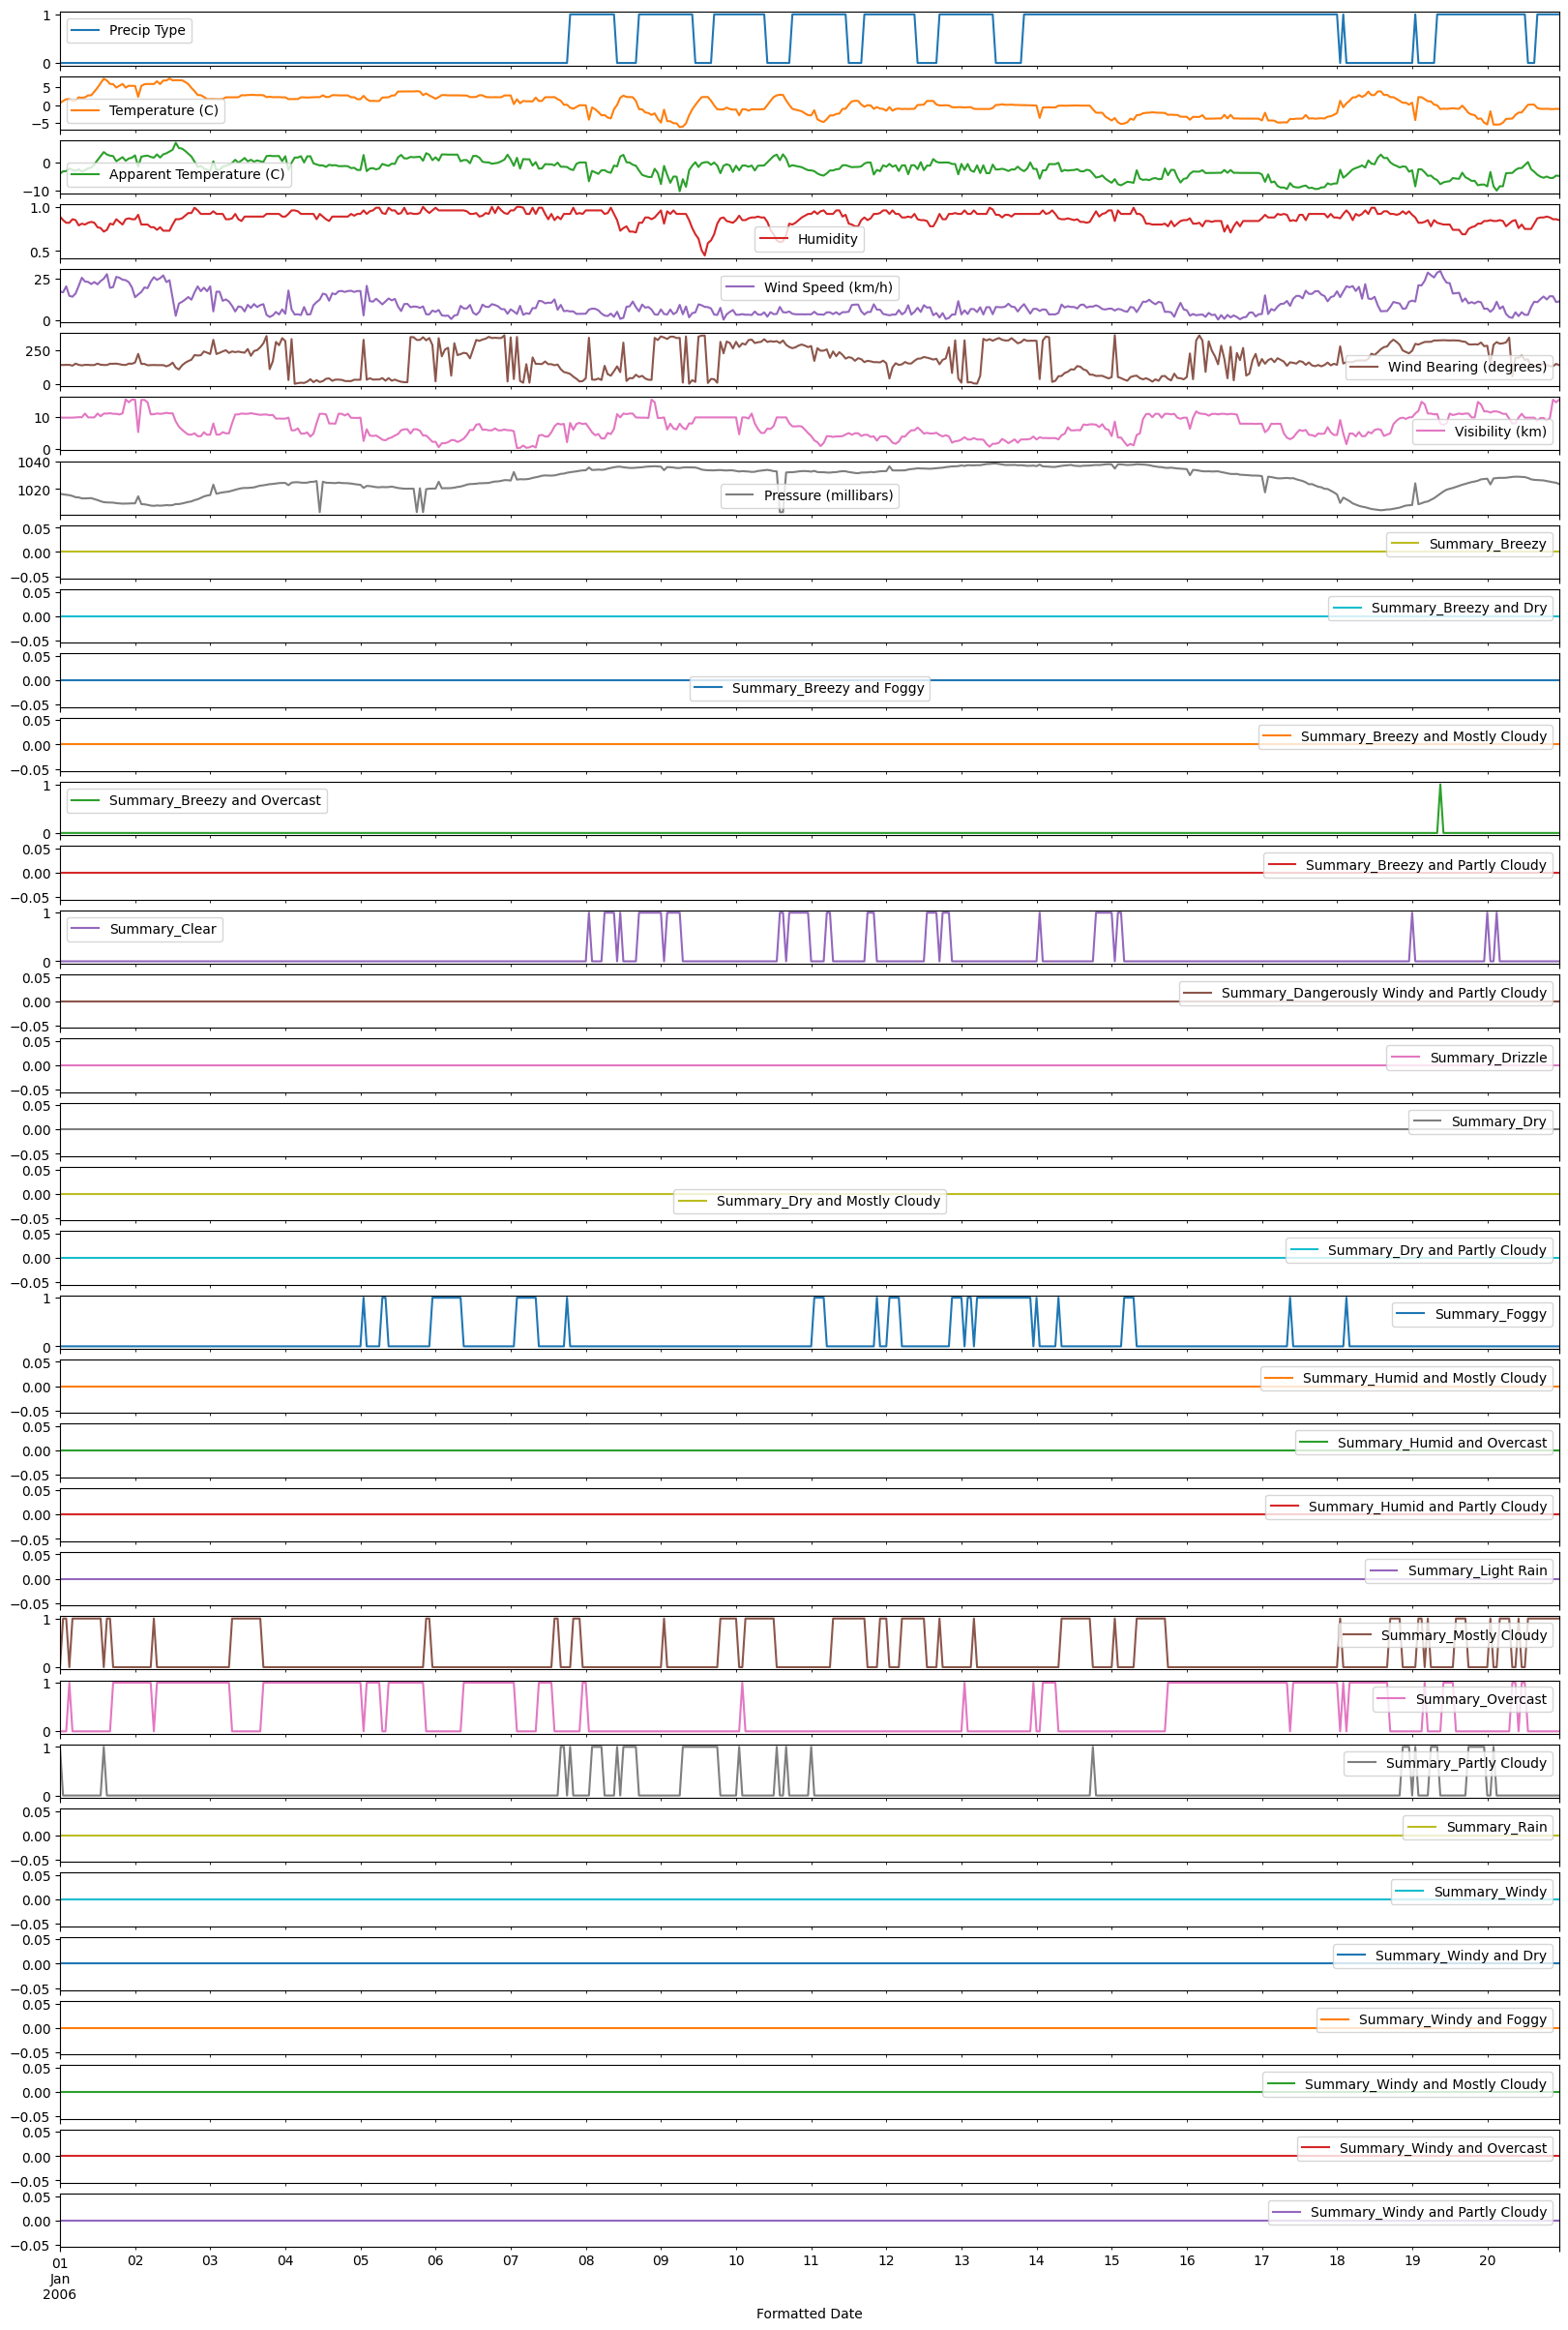

In [29]:
#visualization
plot_cols = df_weather.columns
plot_features = df_weather[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(figsize=(20,30), subplots=True)

Text(0, 0.5, 'Wind Velocity [km/h]')

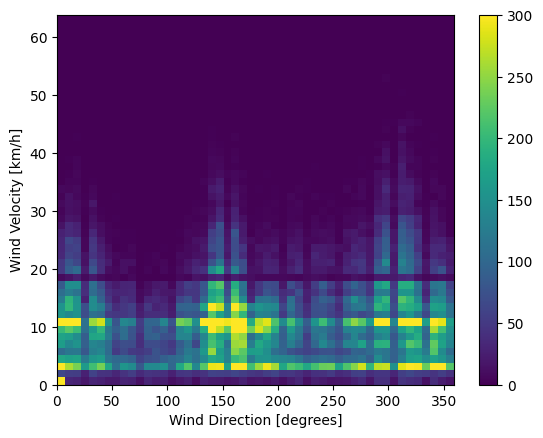

In [30]:
plt.hist2d(df_weather['Wind Bearing (degrees)'], df_weather['Wind Speed (km/h)'], bins=(50, 50), vmax=300)
plt.colorbar()
plt.xlabel('Wind Direction [degrees]')
plt.ylabel('Wind Velocity [km/h]')

In [31]:
wv = df_weather.pop('Wind Speed (km/h)')

# Convert to radians.
wd_rad = df_weather.pop('Wind Bearing (degrees)')*np.pi / 180

# Calculate the wind x and y components.
df_weather['Wx'] = wv*np.cos(wd_rad)
df_weather['Wy'] = wv*np.sin(wd_rad)


(-43.126701119910614, 42.78495677847904, -50.99495376884579, 45.9333)

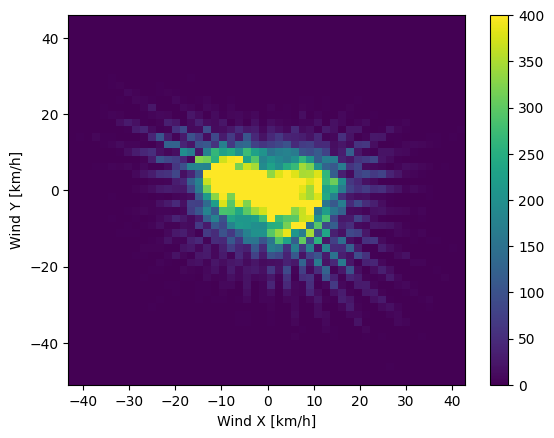

In [32]:
plt.hist2d(df_weather['Wx'], df_weather['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [km/h]')
plt.ylabel('Wind Y [km/h]')
ax = plt.gca()
ax.axis('tight')

In [33]:
timestamp_s = date_time.apply(pd.Timestamp.timestamp)
day = 24*60*60
year = (365.2425)*day

df_weather['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df_weather['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df_weather['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df_weather['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

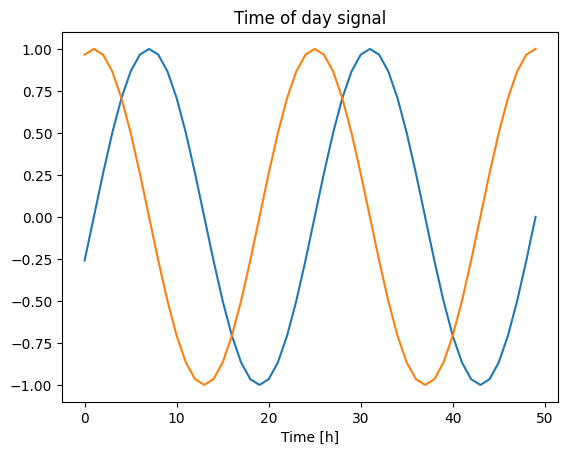

In [34]:
plt.plot(np.array(df_weather['Day sin'])[:50])
plt.plot(np.array(df_weather['Day cos'])[:50])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [35]:
n_timestep = 15
n_timepred = 1

In [36]:
df_weather.columns

Index(['Precip Type', 'Temperature (C)', 'Apparent Temperature (C)',
       'Humidity', 'Visibility (km)', 'Pressure (millibars)', 'Summary_Breezy',
       'Summary_Breezy and Dry', 'Summary_Breezy and Foggy',
       'Summary_Breezy and Mostly Cloudy', 'Summary_Breezy and Overcast',
       'Summary_Breezy and Partly Cloudy', 'Summary_Clear',
       'Summary_Dangerously Windy and Partly Cloudy', 'Summary_Drizzle',
       'Summary_Dry', 'Summary_Dry and Mostly Cloudy',
       'Summary_Dry and Partly Cloudy', 'Summary_Foggy',
       'Summary_Humid and Mostly Cloudy', 'Summary_Humid and Overcast',
       'Summary_Humid and Partly Cloudy', 'Summary_Light Rain',
       'Summary_Mostly Cloudy', 'Summary_Overcast', 'Summary_Partly Cloudy',
       'Summary_Rain', 'Summary_Windy', 'Summary_Windy and Dry',
       'Summary_Windy and Foggy', 'Summary_Windy and Mostly Cloudy',
       'Summary_Windy and Overcast', 'Summary_Windy and Partly Cloudy', 'Wx',
       'Wy', 'Day sin', 'Day cos', 'Year sin',

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()
df_weather = scaler.fit_transform(df_weather)

In [39]:
df_weather

array([[0.        , 0.36288363, 0.35291194, ..., 0.98296291, 0.50196398,
        0.99999614],
       [0.        , 0.37233372, 0.36500704, ..., 1.        , 0.50232237,
        0.99999461],
       [0.        , 0.38052381, 0.36624969, ..., 0.98296291, 0.50268075,
        0.99999281],
       ...,
       [1.        , 0.3497435 , 0.36293596, ..., 0.75      , 0.50374874,
        0.99998595],
       [1.        , 0.34587346, 0.35895949, ..., 0.85355339, 0.50410712,
        0.99998313],
       [1.        , 0.34254343, 0.35531439, ..., 0.9330127 , 0.50446549,
        0.99998006]])

## split dataset

In [40]:
n = len(df_weather)
train_df = df_weather[0:int(n*0.7)]
val_df = df_weather[int(n*0.7):int(n*0.9)]
test_df = df_weather[int(n*0.9):]

n_feature = df_weather.shape[1]

In [41]:
n_feature

39

In [42]:
def timestep_split(data, n_step):
    x, y = [], []

    length = len(data)
    for i in range(n_step, length):
        x.append(data[i-n_step:i])
        y.append(data[i])

    return np.array(x), np.array(y)

In [43]:
x_train, y_train = timestep_split(data=train_df, n_step=n_timestep)
x_val, y_val = timestep_split(data=val_df, n_step=n_timestep)
x_test, y_test = timestep_split(data=test_df, n_step=n_timestep)

In [44]:
x_train[0], y_train[0]

(array([[0.        , 0.36288363, 0.35291194, 0.89      , 0.62      ,
         0.59063361, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.34938665, 0.63960519,
         0.37059048, 0.98296291, 0.50196398, 0.99999614],
        [0.        , 0.37233372, 0.36500704, 0.85      , 0.615     ,
         0.58360882, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 

In [45]:
model = keras.models.Sequential()

model.add(Input(shape=(n_timestep,n_feature), name='Input'))

model.add(LSTM(units=64,
               activation='tanh',
               recurrent_activation='sigmoid',
               use_bias=True,
               kernel_initializer='glorot_uniform',
               recurrent_initializer='orthogonal',
               bias_initializer='zeros',
               dropout=0.0,
               recurrent_dropout=0.0,
               return_sequences=True,
               name='LSTM_many_to_many'))

model.add(LSTM(units=64,
               activation='tanh',
               recurrent_activation='sigmoid',
               use_bias=True,
               kernel_initializer='glorot_uniform',
               recurrent_initializer='orthogonal',
               bias_initializer='zeros',
               dropout=0.0,
               recurrent_dropout=0.0,
               name='LSTM_many_to_one'))

model.add(Dense(units=n_feature,
                activation='sigmoid',
                use_bias=True,
                kernel_initializer='glorot_uniform',
                bias_initializer='zeros',
                name='Output_layer'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001,
                               beta_1=0.9,
                               beta_2=0.999,
                               epsilon=1e-08)

model.compile(optimizer=opt, loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 LSTM_many_to_many (LSTM)    (None, 15, 64)            26624     
                                                                 
 LSTM_many_to_one (LSTM)     (None, 64)                33024     
                                                                 
 Output_layer (Dense)        (None, 39)                2535      
                                                                 
Total params: 62183 (242.90 KB)
Trainable params: 62183 (242.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


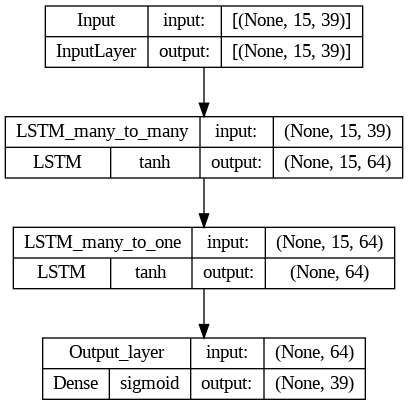

In [46]:
tf.keras.utils.plot_model(model,to_file='/content/gdrive/MyDrive/model/model_LSTM.png', show_layer_activations=True, show_shapes=True, show_layer_names=True)

In [48]:
##timestamp = time.strftime("%Y%m%d%H%M%S")
##path = '/content/gdrive/MyDrive/model/LSTM_model_15timesteps_{timestamp}.h5'
path = '/content/gdrive/MyDrive/model/LSTM_model_15timesteps.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath=path, monitor='val_loss', save_best_only=True)

In [49]:
model.fit(x_train, y_train, epochs=75, verbose=0, callbacks=[checkpoint], batch_size=256,validation_data=(x_val, y_val), validation_batch_size=256)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


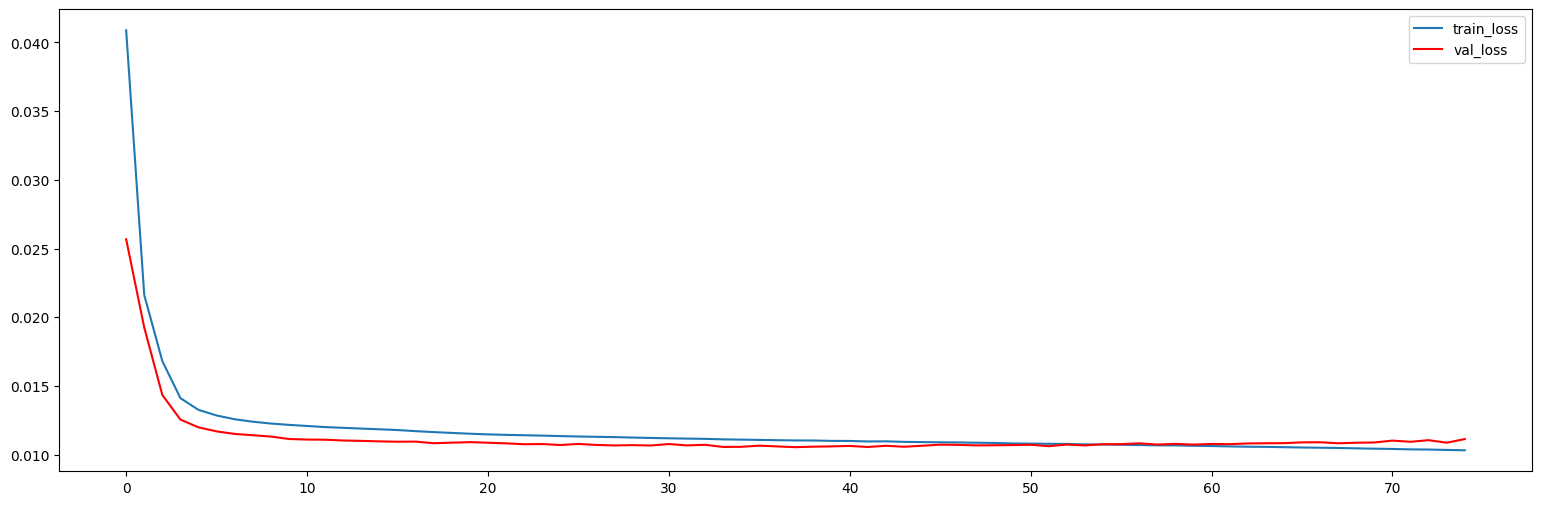

In [50]:
plt.figure(figsize=(19, 6))
plt.plot(model.history.history['loss'], label='train_loss')
plt.plot(model.history.history['val_loss'], c='red', label='val_loss')
plt.legend()

In [51]:
#load best model
model = keras.models.load_model('/content/gdrive/MyDrive/model/LSTM_model_15timesteps.h5')

In [52]:
y_predict = model.predict(x_test)

y_predict_inverse = scaler.inverse_transform(y_predict)
y_test_inverse = scaler.inverse_transform(y_test)

301/301 [==============================] - 4s 9ms/step


In [53]:
y_predict_inverse[0]

array([ 4.37843278e-02,  1.85866320e+00, -1.27818501e+00,  8.41612458e-01,
        9.01091003e+00,  1.00905035e+03,  1.25115528e-03,  2.96528480e-04,
        1.90464931e-03,  6.47398550e-03,  2.68094502e-02,  3.15754209e-03,
        7.45245954e-03,  1.19520526e-03,  5.64340036e-04,  1.12919067e-03,
        1.06695865e-03,  1.58077525e-03,  9.24033113e-03,  7.81041221e-04,
        6.02638116e-04,  8.15309701e-04,  1.59900298e-03,  7.97066391e-02,
        8.84111464e-01,  8.49993434e-03,  4.79678187e-04,  1.06404547e-03,
        8.30326695e-04,  4.81303228e-04,  1.65985152e-03,  7.82728079e-04,
        1.95079797e-03,  7.76390409e+00, -3.50594068e+00, -8.32351506e-01,
       -6.07335806e-01, -5.88365316e-01,  8.46748590e-01], dtype=float32)

In [54]:
y_test_inverse[0]

array([ 0.00000000e+00,  2.85000000e+00,  2.83333333e-01,  8.80000000e-01,
        9.98200000e+00,  1.01025000e+03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  9.27360000e+00,  0.00000000e+00, -8.66025404e-01,
       -5.00000000e-01, -5.73275481e-01,  8.19362693e-01])

In [55]:
rain = y_predict_inverse[:,0] < 0.5
snow = y_predict_inverse[:,0] >= 0.5
y_predict_inverse[rain,0] = 0
y_predict_inverse[snow,0] = 1

In [56]:
BA = keras.metrics.BinaryAccuracy(threshold=0.5)
BA.update_state(y_test_inverse[:,0], y_predict_inverse[:,0])
R_Accuracy = float(BA.result())
print('Accuracy when predicting rain or not: {:.2f}%'.format(R_Accuracy*100))

Accuracy when predicting rain or not: 98.62%


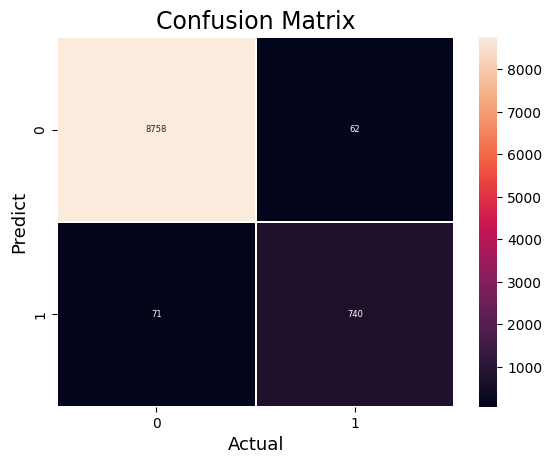

In [57]:
# compute the confusion matrix
cm = confusion_matrix(y_test_inverse[:,0], y_predict_inverse[:,0])

#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            linewidths= 0.2,
            annot_kws={"size": 6})
plt.xlabel('Actual',fontsize=13)
plt.ylabel('Predict',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

plt.show()




## TEM



In [58]:
from keras.metrics import mean_absolute_error

In [59]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,1], y_predict_inverse[:,1]))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 1.321


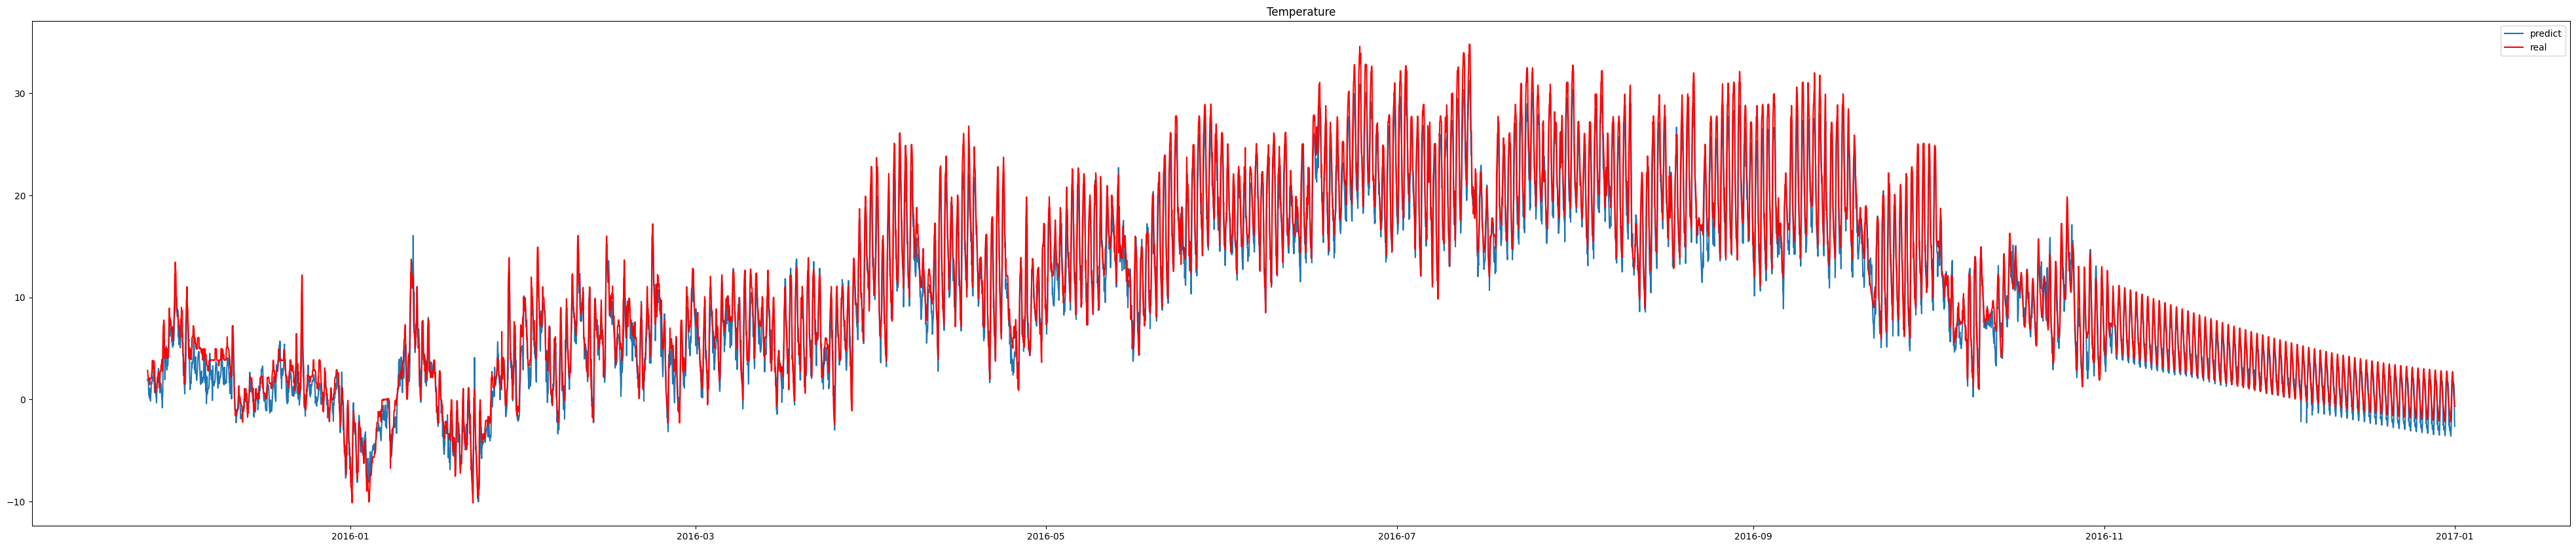

In [60]:
#visualization
plt.figure(figsize=(50,10))
plt.plot( date_time[int(n*0.9) + n_timestep:], y_predict_inverse[:,1], label='predict')
plt.plot( date_time[int(n*0.9) + n_timestep:], y_test_inverse[:,1], c='red', label='real')
plt.title('Temperature')
plt.legend()

## APP TEMP

In [61]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,2], y_predict_inverse[:,2]))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 1.608


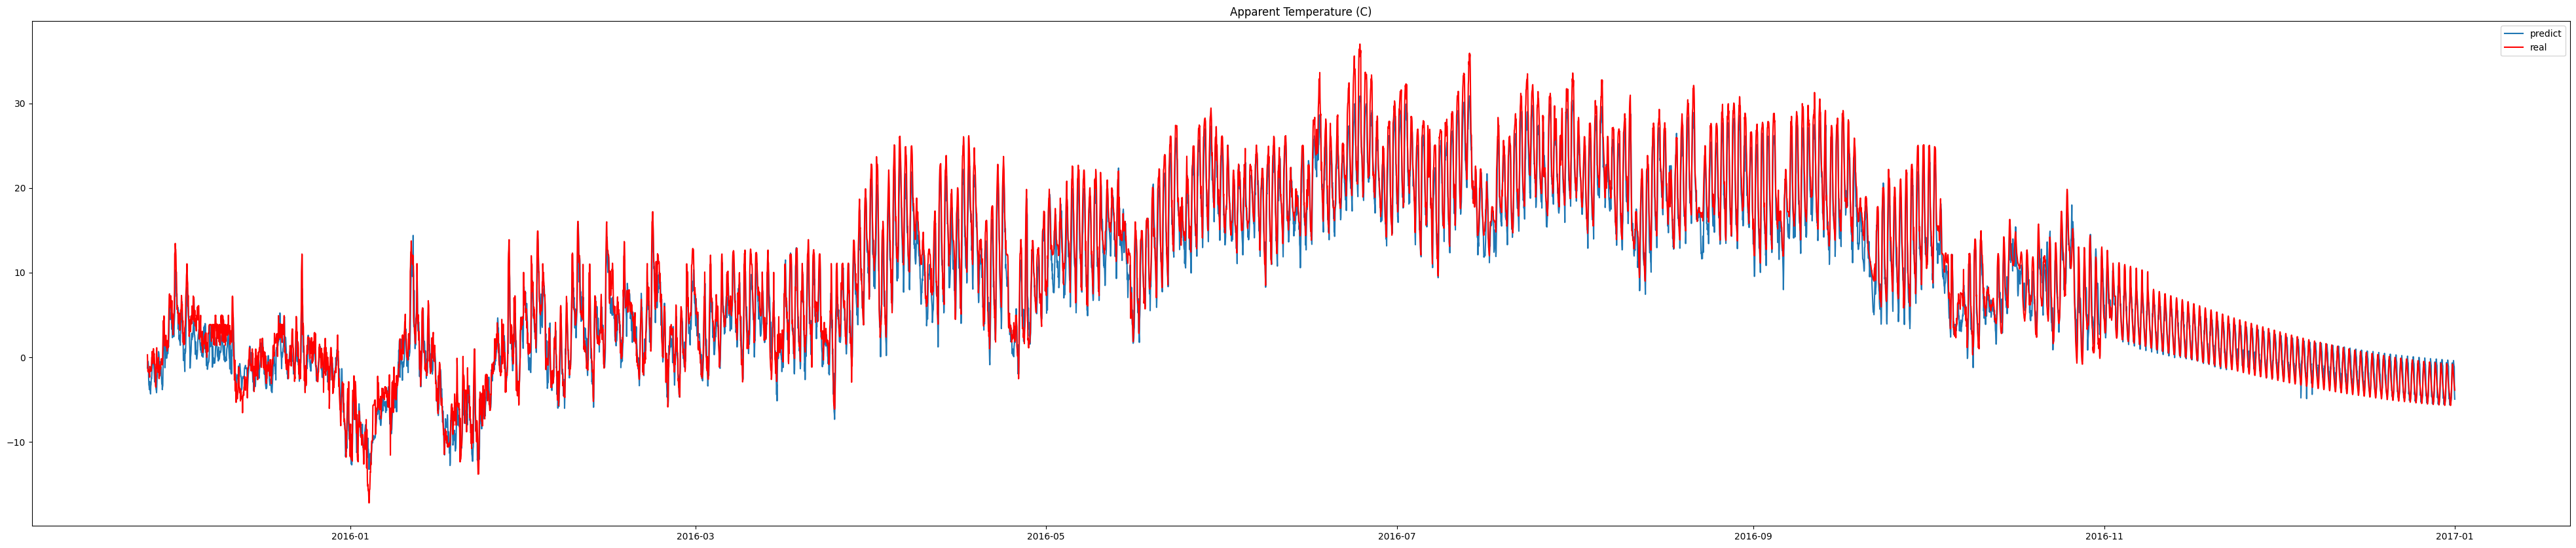

In [62]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], y_predict_inverse[:,2], label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], y_test_inverse[:,2], c='red', label='real')
plt.title('Apparent Temperature (C)')
plt.legend()

## Humidity

In [63]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,3], y_predict_inverse[:,3]))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 0.040


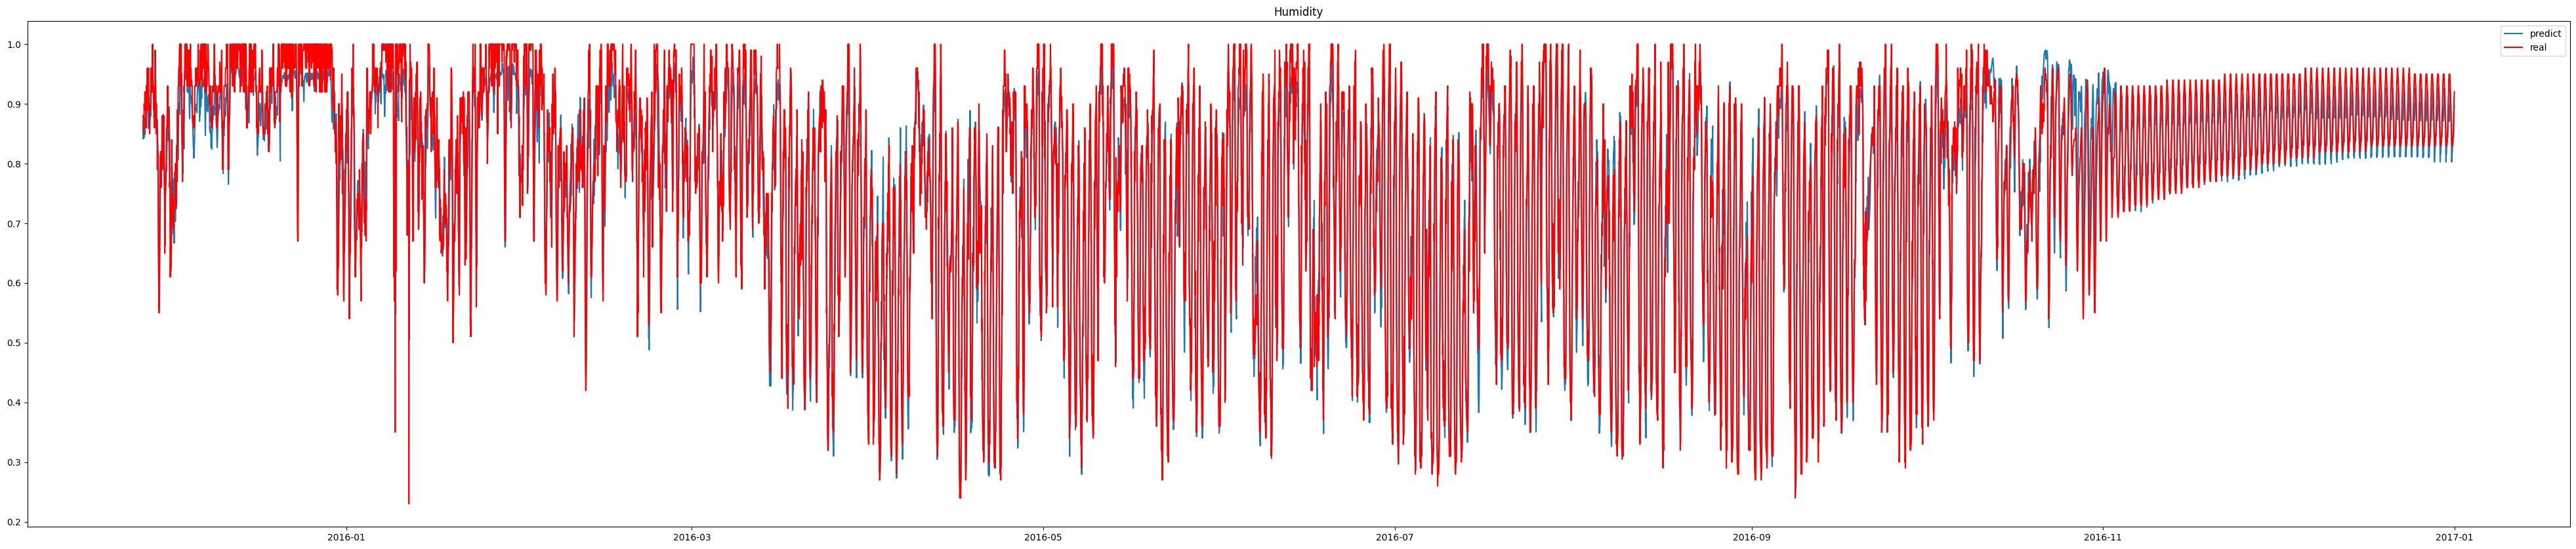

In [64]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], y_predict_inverse[:,3], label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], y_test_inverse[:,3], c='red', label='real')
plt.title('Humidity')
plt.legend()

## Visibility

In [65]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,4], y_predict_inverse[:,4]))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 1.624


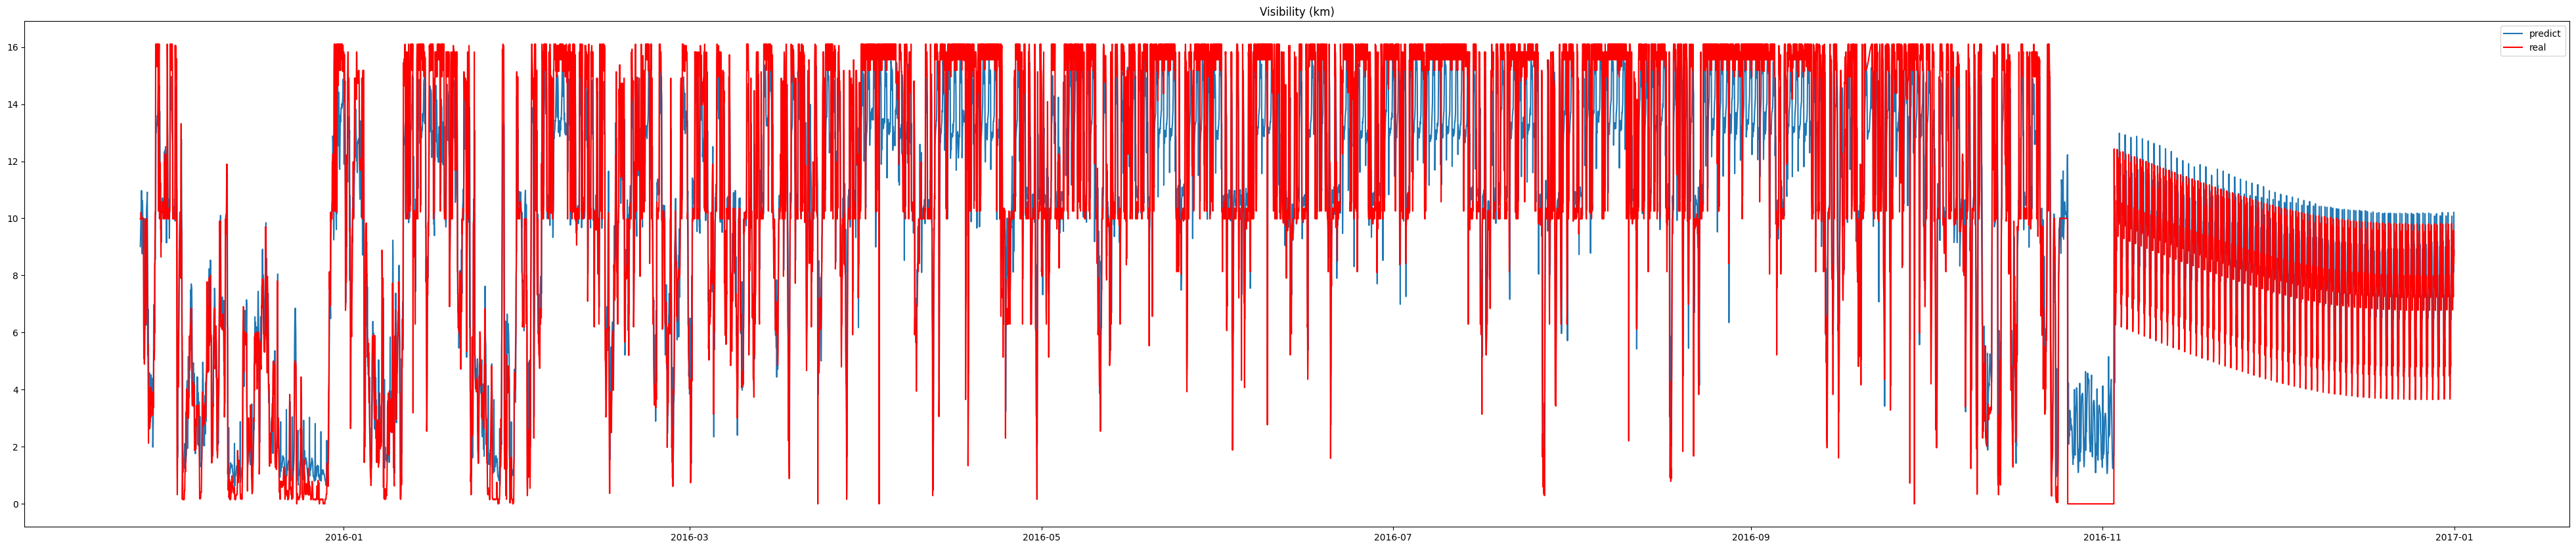

In [66]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], y_predict_inverse[:,4], label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], y_test_inverse[:,4], c='red', label='real')
plt.title('Visibility (km)')
plt.legend()

## Pressure

In [67]:
# mean absolute error
mean = float(mean_absolute_error(y_test_inverse[:,5], y_predict_inverse[:,5]))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 1.461


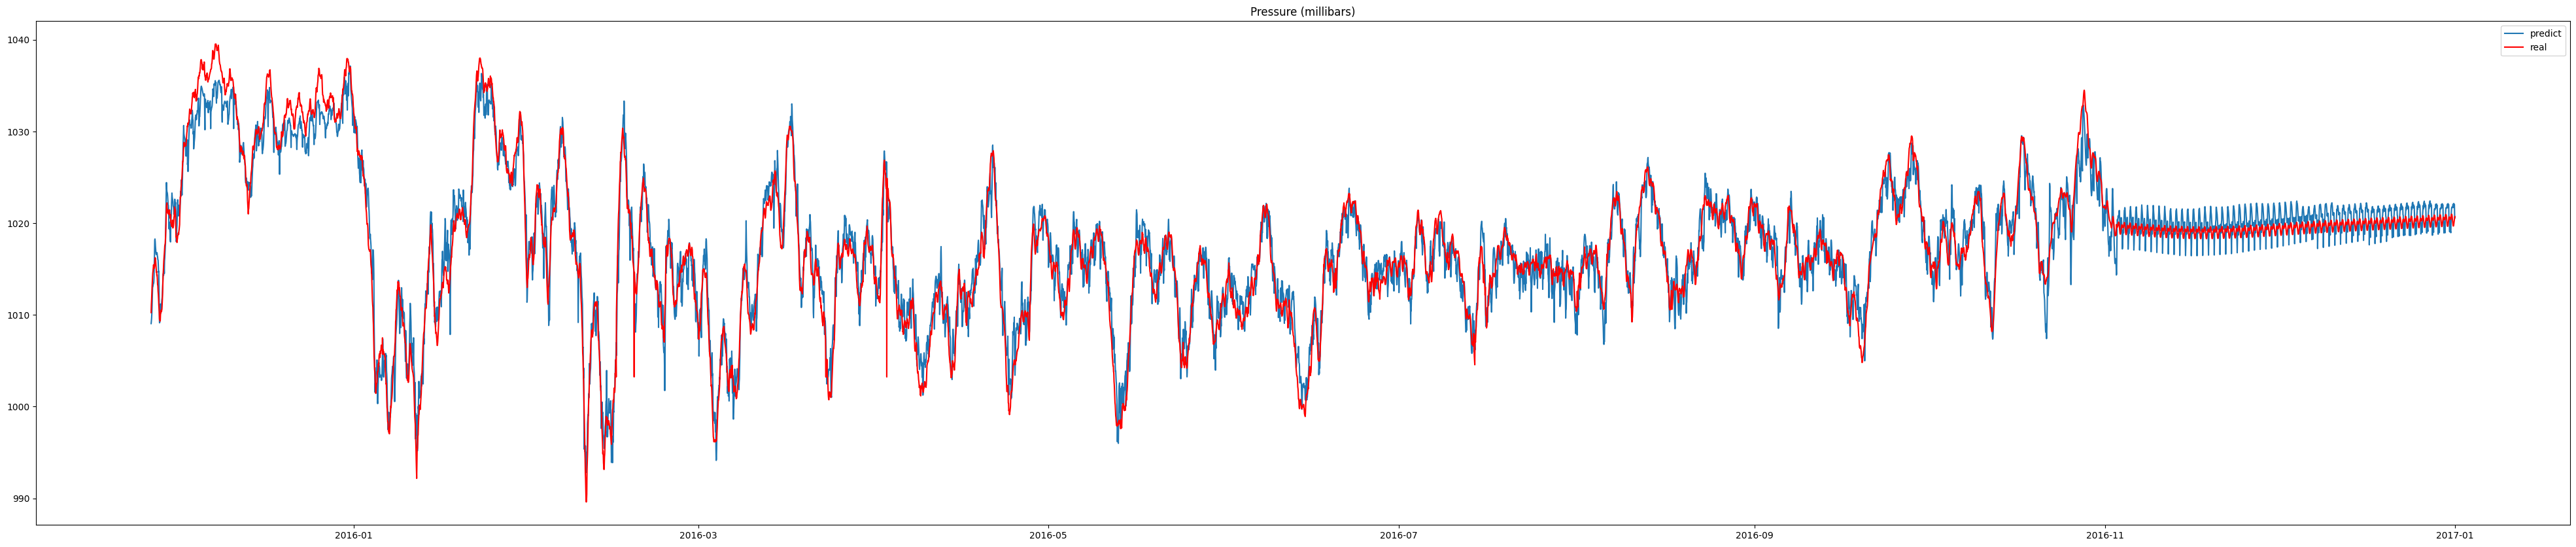

In [68]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], y_predict_inverse[:,5], label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], y_test_inverse[:,5], c='red', label='real')
plt.title('Pressure (millibars)')
plt.legend()

## Summary

In [69]:
Summary_Weather['Weather Type']

0                           Partly Cloudy
1                           Mostly Cloudy
2                                Overcast
3                                   Clear
4                                   Foggy
5                     Breezy and Overcast
6                Breezy and Mostly Cloudy
7                Breezy and Partly Cloudy
8                   Dry and Partly Cloudy
9                 Windy and Partly Cloudy
10                             Light Rain
11                                 Breezy
12                     Windy and Overcast
13                Humid and Mostly Cloudy
14                                Drizzle
15                Windy and Mostly Cloudy
16                       Breezy and Foggy
17                                    Dry
18                Humid and Partly Cloudy
19                  Dry and Mostly Cloudy
20                                   Rain
21                                  Windy
22                     Humid and Overcast
23                        Windy an

In [70]:
max_indices_pre = np.argmax(y_predict_inverse[:, 6:33], axis=1)
print(max_indices_pre)

[18 18 17 ... 17 17 17]


In [71]:
max_indices_test = np.argmax(y_test_inverse[:, 6:33], axis=1)
print(max_indices_test)

[18 17 17 ... 17 17 17]


In [72]:
from sklearn.metrics import accuracy_score
accuracy_score( max_indices_test,max_indices_pre)

0.7914027619146506

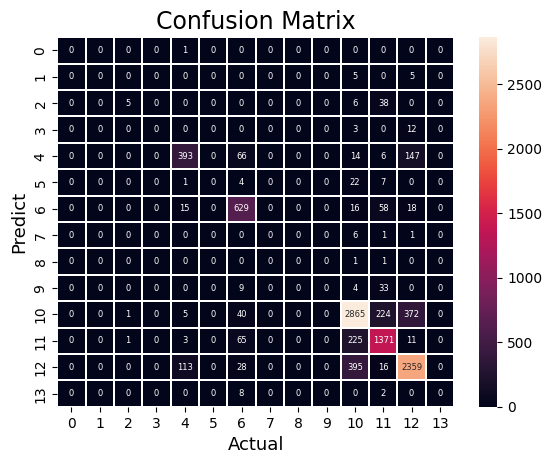

In [73]:
# compute the confusion matrix
cm = confusion_matrix(max_indices_test,max_indices_pre)

#Plot the confusion matrix.

sns.heatmap(cm,
            annot=True,
            fmt='g',
            linewidths= 0.2,
            annot_kws={"size": 6})
# plt.figure(figsize= (5, 5))
plt.xlabel('Actual',fontsize=13)
plt.ylabel('Predict',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)

plt.show()

In [74]:
def convertWind(wx, wy):
    # Convert Wx and Wy to 'Wind Speed (km/h)'
    w_speed = np.sqrt(wx**2 + wy**2)

    # Convert Wx and Wy to 'Wind Bearing (degrees)'
    w_bearing = np.arctan2(wy, wx) * 180 / np.pi
    return w_speed, w_bearing

In [75]:
w_speed_test, w_bearing_test = convertWind(y_test_inverse[:,33], y_test_inverse[:,34])
w_speed_pred, w_bearing_pred = convertWind(y_predict_inverse[:,33], y_predict_inverse[:,34])


In [76]:
# mean absolute error
mean = float(mean_absolute_error(w_speed_test, w_speed_pred))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 2.786


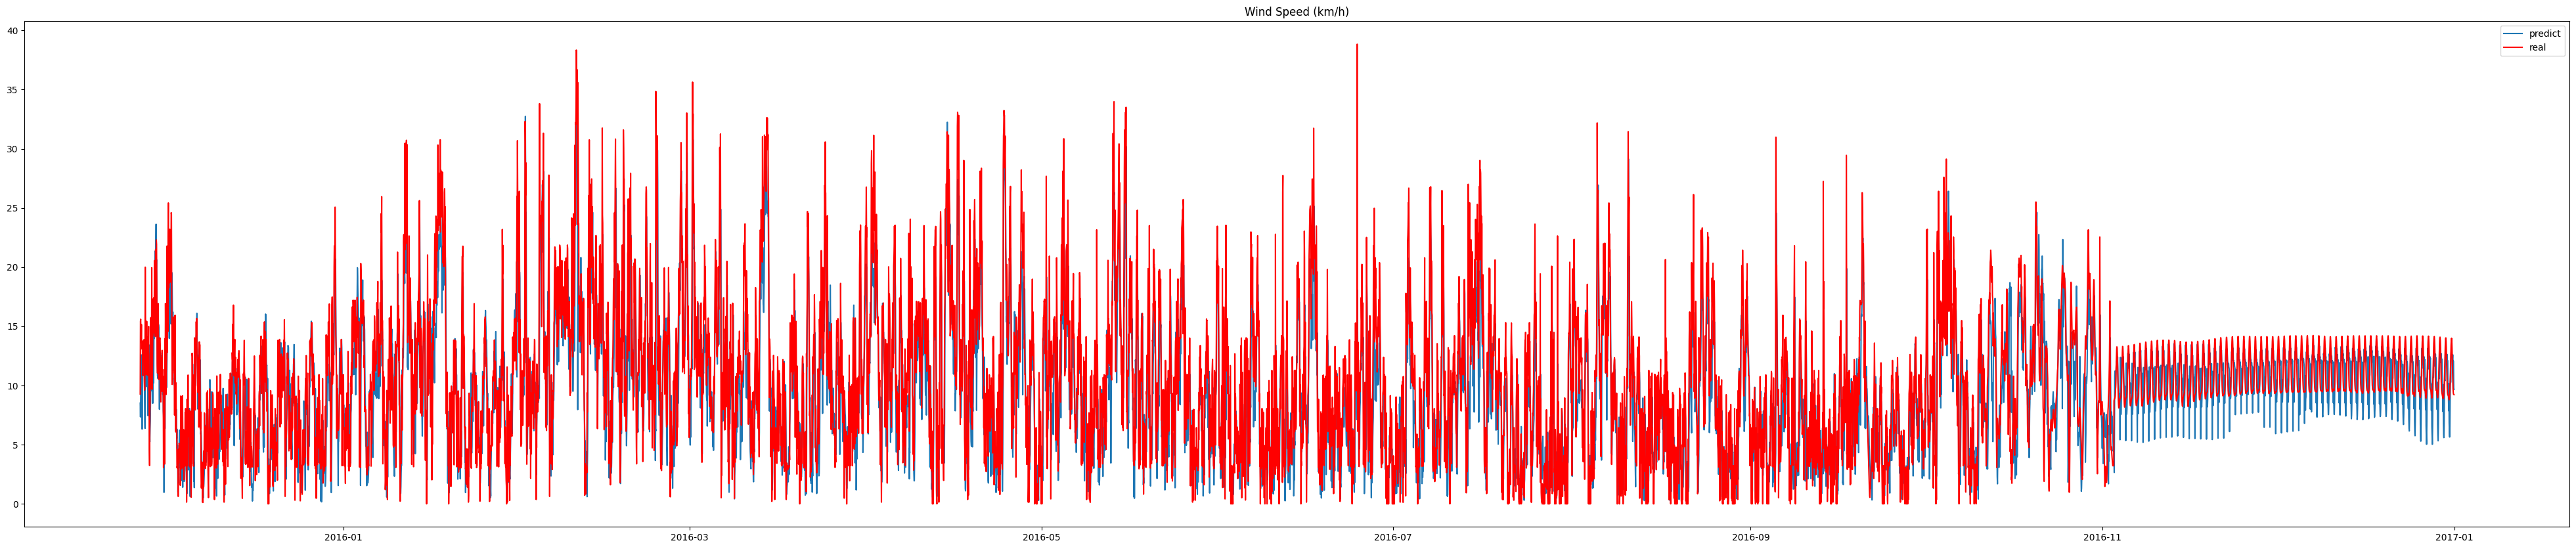

In [77]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], w_speed_pred, label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], w_speed_test, c='red', label='real')
plt.title('Wind Speed (km/h)')
plt.legend()

In [78]:
# mean absolute error
mean = float(mean_absolute_error(w_bearing_test, w_bearing_pred))
print('The average deviation is: {:.3f}'.format(mean))

The average deviation is: 51.922


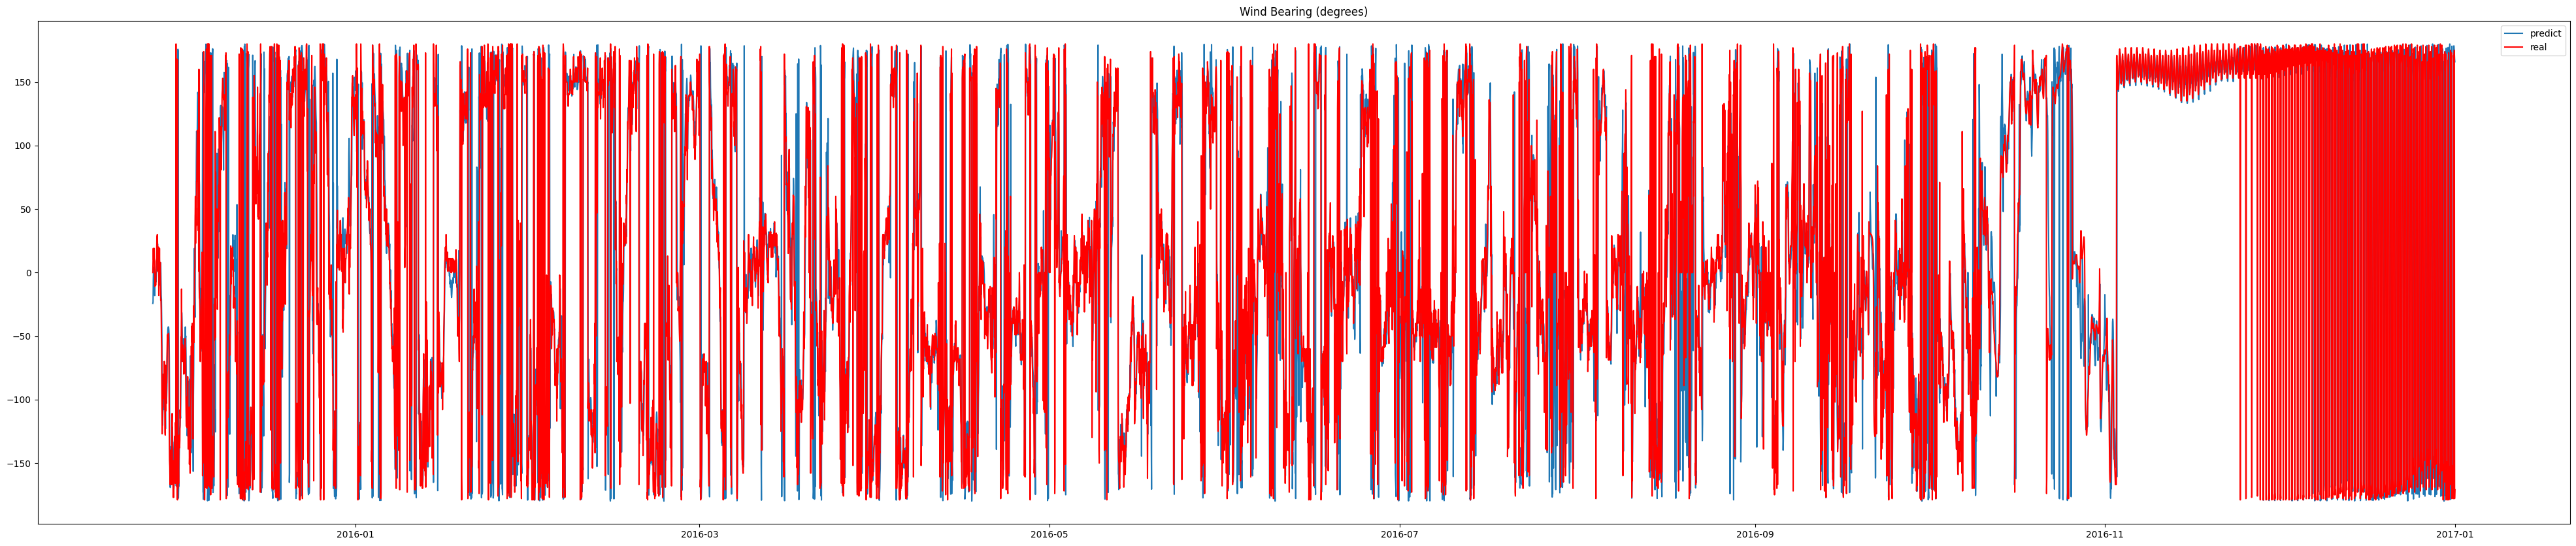

In [79]:
#visualization
plt.figure(figsize=(50,10))
plt.plot(date_time[int(n*0.9) + n_timestep:], w_bearing_pred, label='predict')
plt.plot(date_time[int(n*0.9) + n_timestep:], w_bearing_test, c='red', label='real')
plt.title('Wind Bearing (degrees)')
plt.legend()